In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [2]:
df = pd.read_csv('./propaganda.csv')

In [3]:
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
covariance_tv_vendas = df['TV'].cov(df['Vendas'])
covariance_tv_vendas

350.39019472361804

In [7]:
covariance_radio_vendas = df['Radio'].cov(df['Vendas'])
covariance_radio_vendas

44.635688442211034

In [9]:
covariance_jornal_vendas = df['Jornal'].cov(df['Vendas'])
covariance_jornal_vendas

25.94139195979899

In [16]:
correlation_tv_vendas = df['TV'].corr(df['Vendas'])
correlation_tv_vendas

0.7822244248616061

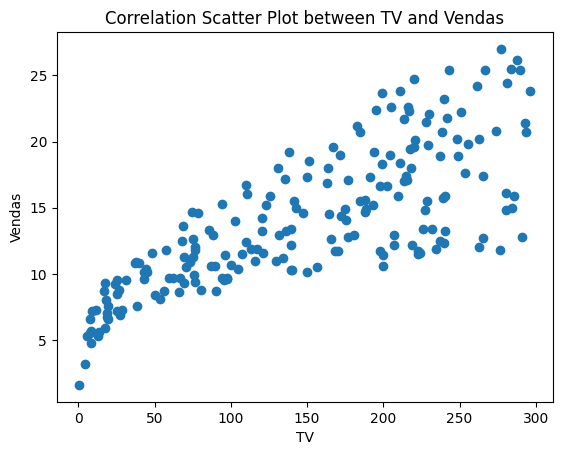

In [18]:
plt.scatter(df['TV'], df['Vendas'])
plt.title('Correlation Scatter Plot between TV and Vendas')
plt.xlabel('TV')
plt.ylabel('Vendas')
plt.show()

In [17]:
correlation_radio_vendas = df['Radio'].corr(df['Vendas'])
correlation_radio_vendas

0.5762225745710551

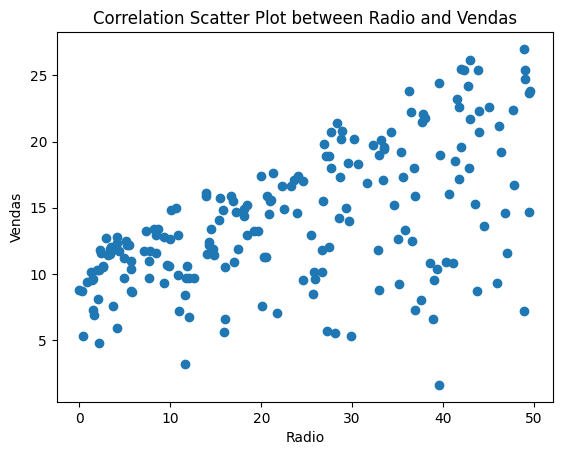

In [19]:
plt.scatter(df['Radio'], df['Vendas'])
plt.title('Correlation Scatter Plot between Radio and Vendas')
plt.xlabel('Radio')
plt.ylabel('Vendas')
plt.show()

In [21]:
correlation_jornal_vendas = df['Jornal'].corr(df['Vendas'])
correlation_jornal_vendas

0.22829902637616528

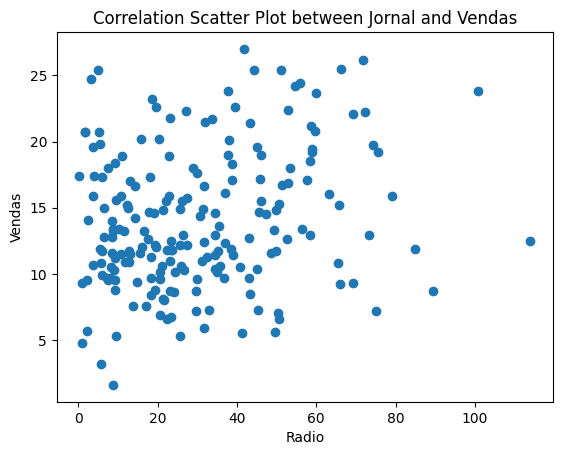

In [22]:
plt.scatter(df['Jornal'], df['Vendas'])
plt.title('Correlation Scatter Plot between Jornal and Vendas')
plt.xlabel('Radio')
plt.ylabel('Vendas')
plt.show()

Given the three variables the one with most correlation to Vendas is TV advertisement, therefore is the one we're going to use for our simple linear regression

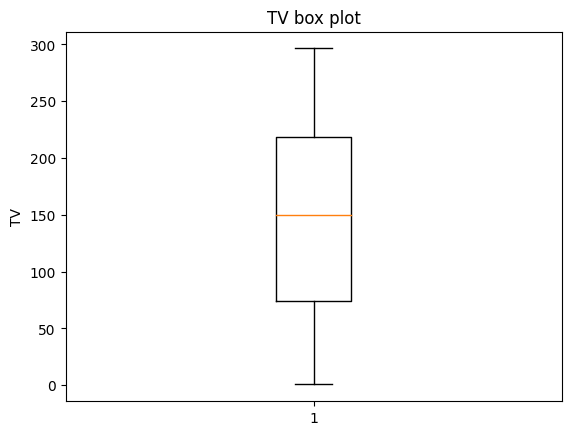

In [24]:
plt.boxplot(df['TV'])
plt.title('TV box plot')
plt.ylabel('TV')
plt.show()

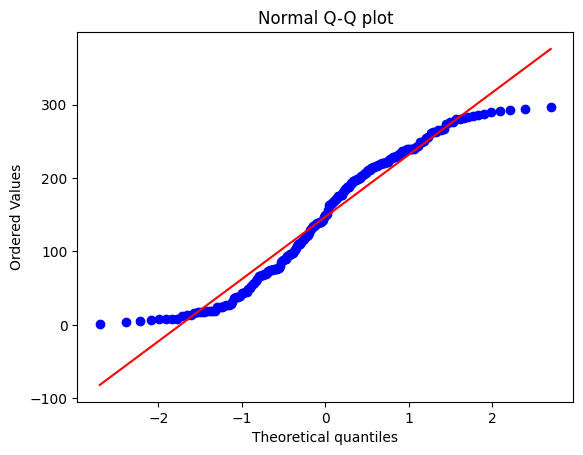

In [27]:
stats.probplot(df['TV'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

Shapiro-Wilk test

Ho = normal distribution: p > 0.05 

Ha = not normal distribution: p <= 0.5

In [29]:
stats.shapiro(df['TV'])

ShapiroResult(statistic=0.9495095014572144, pvalue=1.692740511316515e-06)

In [30]:
stats.shapiro(df['Vendas'])

ShapiroResult(statistic=0.9760257005691528, pvalue=0.001682588830590248)

In [32]:
coef, p = stats.kendalltau(df['TV'], df['Vendas'])
print('Correlation coeficient: {}'.format(coef))
print('p-valor: {}'.format(p))

Correlation coeficient: 0.6219463551009411
p-valor: 7.134710358862362e-39


In [34]:
regression_model = smf.ols('TV ~ Vendas', data=df).fit()

In [35]:
residues = regression_model.resid
residues

0     -20.913262
1     -55.914944
2     -69.056128
3     -53.175318
4      48.205928
         ...    
195   -26.174321
196     2.795212
197    45.693093
198   -11.176876
199    93.070103
Length: 200, dtype: float64

## 1st Assumption - Residues normality test


Ho = normal distribution: p > 0.05

Ha = not normal distribution: p <= 0.05

In [37]:
stats.shapiro(residues)

ShapiroResult(statistic=0.9322934150695801, pvalue=5.1600121508954544e-08)

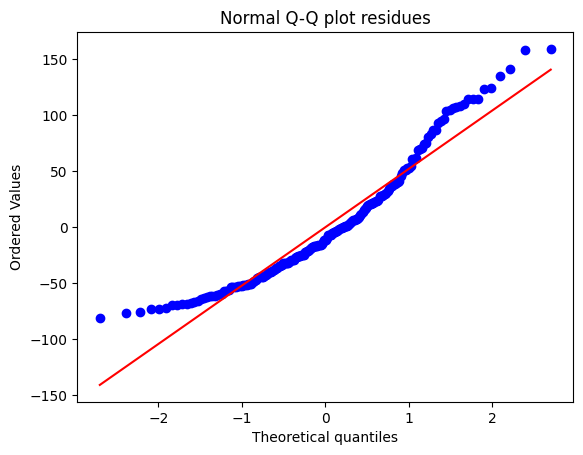

In [38]:
stats.probplot(residues, dist='norm', plot=plt)
plt.title('Normal Q-Q plot residues')
plt.show()

## 2nd Assumption: Residues homcedasticity 

Data is homocedastic when there are constant variation  

Test Breusch-Pagan (homocedasticity or heterocedasticity)

Ho = there is homocedasticity: p > 0.05

Ha = there is no homocedasticity: p <= 0.05

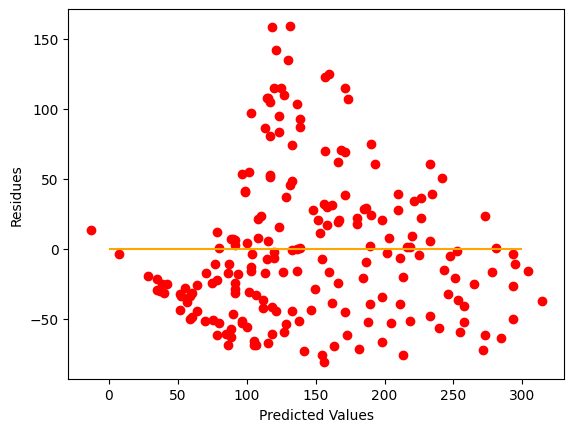

In [42]:
plt.scatter(y=residues, x=regression_model.predict(), color='red')
plt.hlines(y=   0, xmin=0, xmax=300, color='orange')
plt.ylabel('Residues')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
statistic, p, f, fp = sms.het_breuschpagan(regression_model.resid, regression_model.model.exog)

print('Test statistic: {}'.format(statistic))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Test statistic: 0.5387765674905731
p-valor: 0.46294019923010366
f-valor: 0.5348295700152884
f_p-valor: 0.4654480545465288


## Residue outliers

In outliers test the values should be between -3 and 3

In [46]:
outliers = regression_model.outlier_test()

In [47]:
outliers.max()

student_resid    3.041896
unadj_p          0.996202
bonf(p)          1.000000
dtype: float64

In [48]:
outliers.min()

student_resid   -1.520628
unadj_p          0.002671
bonf(p)          0.534211
dtype: float64

In [49]:
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        00:34:20   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.0